In [1]:
import ee
import numpy as np
import matplotlib.pyplot as plt
import shapefile as sf
import pandas as pd

In [2]:
ee.Authenticate()


Successfully saved authorization token.


In [3]:
ee.Initialize(project = 'sediment-473319')

In [4]:
aoi=ee.Geometry.Rectangle([31.71630970,-24.05487960,31.72086902,-24.05871824])

In [10]:
# start = pd.date_range(start= '2017-08-08' , end='2024-06-22' , 
#               freq='5d')
# end = pd.date_range(start='2017-08-13' , end='2024-06-27' , 
#               freq='5d')
start = pd.date_range(start= '2017-08-13' , end='2017-08-13' , 
              freq='5d')
end = pd.date_range(start='2017-08-18' , end='2017-08-18' , 
              freq='5d')
dates = pd.DataFrame ({'start': start ,  'end': end})
print(dates)

       start        end
0 2017-08-13 2017-08-18


In [6]:
# Define function
def pulldata(startDate, endDate):
    # Define source data
    image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')\
        .filterDate(startDate, endDate)\
        .select('B1','B2','B3', 'B4', 'B5','B6','B7','B8','B9','B11','B12')
         #.filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 10)\
    
    # CRS is not the same.
    # proj = image.first().select('B2').projection() # EPSG:32656, UTM zone 56N (Siberia?)
    # proj = balule.projection() # EPSG:4326

    # Export arrays
    # https://gist.github.com/jdbcode/f4d56d72f7fc5beeaa3859999b1f5c3d
    # https://gist.github.com/jdbcode/f4d56d72f7fc5beeaa3859999b1f5c3d?permalink_comment_id=3355627#gistcomment-3355627
    mosaic = image.median().reproject(crs='EPSG:32736', scale=10) # This allows us to set the resolution.
    band_arrs = mosaic.sampleRectangle(region=aoi, defaultValue = 0)
    
    # Get individual band arrays.
    band_arr_b1 = band_arrs.get('B1')   # Costal Blue 
    band_arr_b2 = band_arrs.get('B2')   # Blue
    band_arr_b3 = band_arrs.get('B3')   # Green
    band_arr_b4 = band_arrs.get('B4')   # Red
    band_arr_b5 = band_arrs.get('B5')   # Red edge
    band_arr_b6 = band_arrs.get('B6')   # Red edge 2
    band_arr_b7 = band_arrs.get('B7')   # Red edge 3
    band_arr_b8 = band_arrs.get('B8')   # NIR
    band_arr_b9 = band_arrs.get('B9')   # Water vapor
    #band_arr_b10 = band_arrs.get('B10') # Shortwave IR
    band_arr_b11 = band_arrs.get('B11') # SWIR 1
    band_arr_b12 = band_arrs.get('B12') # SWIR 2

    # Transfer the arrays from server to client and cast as np array.
    b1 = np.array(band_arr_b1.getInfo())   # b1  Costal Blue
    b2 = np.array(band_arr_b2.getInfo())   # b2  Blue
    b3 = np.array(band_arr_b3.getInfo())   # b3  Green
    b4 = np.array(band_arr_b4.getInfo())   # b4  Red
    b5 = np.array(band_arr_b5.getInfo())   # b5  Red edge
    b6 = np.array(band_arr_b6.getInfo())   # b6  Red edge 2 
    b7 = np.array(band_arr_b7.getInfo())   # b7  Red edge 3
    b8 = np.array(band_arr_b8.getInfo())   # b8  NIR
    b9 = np.array(band_arr_b9.getInfo())   # b9  Water vapor 
    #b10 = np.array(band_arr_b10.getInfo()) # b10 Shortwave IR
    b11 = np.array(band_arr_b11.getInfo()) # b11 SWIR 1
    b12 = np.array(band_arr_b12.getInfo()) # b12 SWIR 2

    np_arr_b1 = np.expand_dims(b1, 2)
    np_arr_b2 = np.expand_dims(b2, 2)
    np_arr_b3 = np.expand_dims(b3, 2)
    np_arr_b4 = np.expand_dims(b4, 2)
    np_arr_b5 = np.expand_dims(b5, 2)
    np_arr_b6 = np.expand_dims(b6, 2)
    np_arr_b7 = np.expand_dims(b7, 2)
    np_arr_b8 = np.expand_dims(b8, 2)
    np_arr_b9 = np.expand_dims(b9, 2)
    #np_arr_b10 = np.expand_dims(b10, 2)
    np_arr_b11 = np.expand_dims(b11, 2)
    np_arr_b12 = np.expand_dims(b12, 2)

    output = np.concatenate((np_arr_b1, np_arr_b2, np_arr_b3, np_arr_b4, np_arr_b5, np_arr_b6, np_arr_b7, np_arr_b8, np_arr_b9, np_arr_b11, np_arr_b12), 2)
    output = (255*((output-100)/3500)).astype('uint8')
    plt.imshow(output)
    plt.savefig("test.tif")
    


In [12]:
# Define function
def testGEE(startDate, endDate):
    # Define source data
    image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')\
        .filterDate(startDate, endDate)\
        .select('B1','B2','B3', 'B4', 'B5','B6','B7','B8','B9','B11','B12')\
        .filterBounds(aoi)
    mosaic = image.median().reproject(crs='EPSG:32736', scale=10) # This allows us to set the resolution.
    band_arrs = mosaic.sampleRectangle(region=aoi, defaultValue = 0)
    # Get individual band arrays.
    band_arr_b2 = band_arrs.get('B2')   # Blue
    band_arr_b3 = band_arrs.get('B3')   # Green
    band_arr_b4 = band_arrs.get('B4')   # Red
    # Transfer the arrays from server to client and cast as np array.
    b2 = np.array(band_arr_b2.getInfo())   # b2  Blue
    b3 = np.array(band_arr_b3.getInfo())   # b3  Green
    b4 = np.array(band_arr_b4.getInfo())   # b4  Red
    # Export RGB
    np_arr_b4 = np.expand_dims(b4, 2)
    np_arr_b3 = np.expand_dims(b3, 2)
    np_arr_b2 = np.expand_dims(b2, 2)
    rgb_img = np.concatenate((np_arr_b4, np_arr_b3, np_arr_b2), 2)
    rgb_img = (255*((rgb_img)/3000)).astype('uint8')
    plt.imshow(rgb_img)
    plt.show()

In [20]:
def pulldata(startDate, endDate):
    "COPERNICUS/S2_SR_HARMONIZED"
    # Defining image collection to draw from
    image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')\
        .filterDate(startDate, endDate)\
        .select('B1','B2','B3', 'B4', 'B5','B6','B7','B8','B9','B11','B12')\
        .filterBounds(aoi)\
        .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 10)
    med = image.median().reproject(crs='EPSG:32736', scale=10) # This allows us to set the resolution.
    #mosaic = med.sampleRectangle(region=aoi, defaultValue = 0)
    clipped_image = med.clip(aoi)#.select(['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B11','B12'])

    # Exporting image
    task = ee.batch.Export.image.toDrive(image=clipped_image,
                                     description=f'River_Images',
                                     scale=15,
                                     region=aoi,
                                     fileNamePrefix=f'Rivers',
                                     crs='EPSG:4326',
                                     fileFormat='GeoTIFF',
                                     folder='Turbidity_Images')
    task.start()

In [29]:
del dates

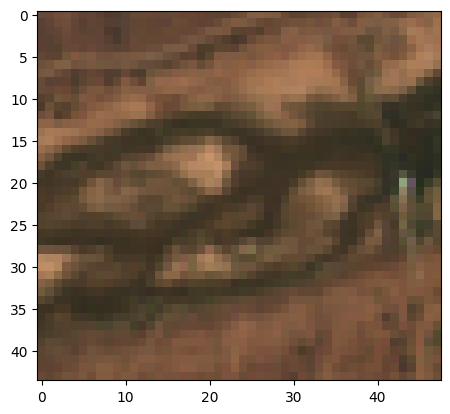

In [21]:
# Run over all dates
for i in range(len(dates)):
    testGEE(dates["start"][i], dates["end"][i])
    pulldata(dates["start"][i], dates["end"][i])